In [33]:
#Winning Factor 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print('Import Done')


Import Done


In [34]:
df = pd.read_csv(r"C:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\EDA\McLaren_Feature_Table.csv", sep=';')
print("Feature_Table:", df.columns.tolist())

#Encode categorical columns
df['LOCATION_CODE'] = pd.factorize(df['LOCATION'])[0]
df['COUNTRY_CODE'] = pd.factorize(df['COUNTRY'])[0]
df['DRIVER_NATIONALITY_CODE'] = pd.factorize(df['DRIVER_NATIONALITY'])[0]

print(df[['LOCATION', 'LOCATION_CODE', 'COUNTRY', 'COUNTRY_CODE', 'DRIVER_NATIONALITY', 'DRIVER_NATIONALITY_CODE']].head())


Feature_Table: ['CONSTRUCTOR_NAME', 'DRIVERID', 'DRIVER_NAME', 'DRIVER_NATIONALITY', 'ROUND', 'SEASON', 'CUIRCIT', 'CIRCUIT_NAME', 'LOCATION', 'COUNTRY', 'GRID', 'POSITION', 'STATUS', 'POINTS', 'LAPS', 'TIME', 'TIME_IN_MILLISECONDS', 'Q1_IN_MILLISECONDS', 'Q2_IN_MILLISECONDS', 'Q3_IN_MILLISECONDS', 'PIT_COUNT', 'AVG_PIT_DURATION', 'TOTAL_PIT_TIME']
       LOCATION  LOCATION_CODE    COUNTRY  COUNTRY_CODE DRIVER_NATIONALITY  \
0     Melbourne              0  Australia             0            British   
1     Melbourne              0  Australia             0            British   
2  Kuala Lumpur              1   Malaysia             1            British   
3  Kuala Lumpur              1   Malaysia             1            British   
4      Shanghai              2      China             2            British   

   DRIVER_NATIONALITY_CODE  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


In [43]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.fillna(numeric_df.mean())


numeric_df

,DRIVERID,ROUND,SEASON,CUIRCIT,GRID,POSITION,POINTS,LAPS,TIME_IN_MILLISECONDS,Q1_IN_MILLISECONDS,Q2_IN_MILLISECONDS,Q3_IN_MILLISECONDS,PIT_COUNT,AVG_PIT_DURATION,TOTAL_PIT_TIME,LOCATION_CODE,COUNTRY_CODE,DRIVER_NATIONALITY_CODE
0,1,1,2011,1,2,2,18.0,58,5392556,1884000.0,2035000.0,1747000.0,2,23.2130,46.426,0,0,0
1,18,1,2011,1,4,6,8.0,58,5424563,2386000.0,2397000.0,2219000.0,3,20.9503,62.851,0,0,0
2,18,2,2011,2,4,2,18.0,56,5863093,2253000.0,2669000.0,2300000.0,3,22.4513,67.354,1,1,0
3,1,2,2011,2,2,8,4.0,56,5929789,3021000.0,2952000.0,3014000.0,4,23.2527,93.011,1,1,0
4,1,3,2011,17,3,1,25.0,56,5818226,2251000.0,2526000.0,2503000.0,3,20.6593,61.978,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,857,22,2024,80,8,7,6.0,50,4977334,2430000.0,2004000.0,2013000.0,2,24.4070,48.814,34,29,5
323,857,23,2024,78,4,3,15.0,57,5472142,2081000.0,1381000.0,2029000.0,3,26.6703,80.011,33,28,5
324,846,23,2024,78,3,10,2.0,57,5501085,1838000.0,2183000.0,1972000.0,4,29.6077,118.431,33,28,0
325,846,24,2024,24,1,1,25.0,58,5193291,2062000.0,1478000.0,1915000.0,1,21.2760,21.276,17,16,0


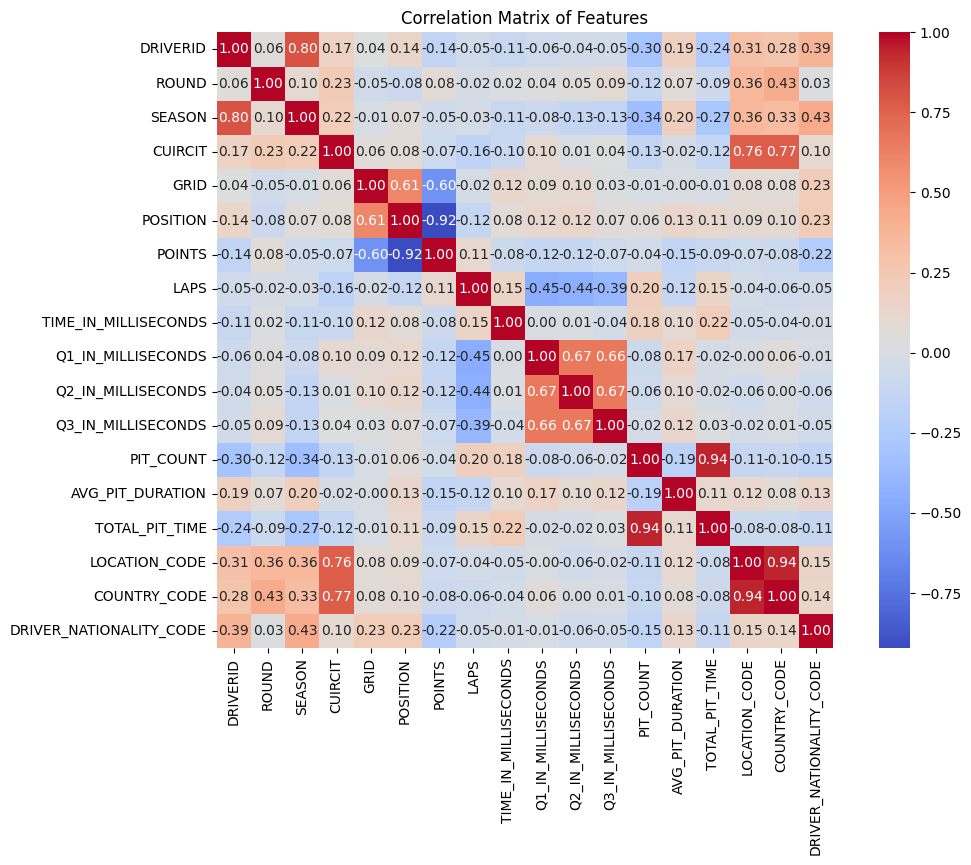

In [44]:
#Correlation matrix
corr = numeric_df.corr()

#Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [50]:
y = numeric_df['POSITION'].apply(lambda x: 1 if x == 1 else 0)  #1 meaning the driver won

features = [
    "GRID",
    "Q3_IN_MILLISECONDS",
    "PIT_COUNT",
    "AVG_PIT_DURATION",
    "TIME_IN_MILLISECONDS",
    "LOCATION_CODE",
    "COUNTRY_CODE",
    "DRIVER_NATIONALITY_CODE",
    "SEASON"
]

X = numeric_df[features]

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
log = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)


In [47]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('log', log),
        ('svc', svc)
    ],
    voting='soft'  
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)


In [48]:
print("Voting Ensemble Model Performance:\n")
print(classification_report(y_test, y_pred))


Voting Ensemble Model Performance:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        93
           1       0.33      0.17      0.22         6

    accuracy                           0.93        99
   macro avg       0.64      0.57      0.59        99
weighted avg       0.91      0.93      0.92        99



In [49]:
for name, model in [('Random Forest', rf), ('Gradient Boosting', gb), ('Logistic Regression', log), ('SVC', svc)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))



Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.50      0.33      0.40         6

    accuracy                           0.94        99
   macro avg       0.73      0.66      0.68        99
weighted avg       0.93      0.94      0.93        99


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        93
           1       0.33      0.33      0.33         6

    accuracy                           0.92        99
   macro avg       0.65      0.65      0.65        99
weighted avg       0.92      0.92      0.92        99


Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        93
           1       0.00      0.00      0.00         6

    accuracy                           0.93        99
   macro avg       0.47      0.49      0.48        99
weighted avg 

c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 